## **Studi Kasus 1**
### **Project Klasifikasi Sentimen Analisis**
---

### Sentimen Intensif Mobil Listrik Indonesia
----

In [1]:
#library yang digunakan, jika dirasa kurang penting dapat dihapus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import ConfusionMatrixDisplay
from textblob import TextBlob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RESTU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RESTU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import pandas as pd
data = pd.read_csv("../data/mobil_listrik.csv")
data = data.dropna()
print(data.head())

                  id_komentar        nama_akun                    tanggal  \
0  Ugzbll5eyrIy3-gdUUJ4AaABAg          Sqn Ldr  2023-08-06 12:54:49+00:00   
1  UgzEDUiV3OTrV943p8p4AaABAg       lushen ace  2023-08-04 12:16:23+00:00   
2  UgwqJqu6JMF4EH2CsVV4AaABAg  Fatih Al-Ayyubi  2023-08-04 10:17:57+00:00   
3  UgyYicCMR1rKwuOj2Y14AaABAg        yp office  2023-08-04 08:29:54+00:00   
4  UgxKAcLuAwZOQK6es-x4AaABAg    Lembur Kuring  2023-08-04 07:55:37+00:00   

                                       text_cleaning sentimen  
0  saran sih bikin   harga ionic sama kayak brio ...  positif  
1  problem subsidi kualitas diturunin harga dinai...  negatif  
2  baik kualitas kembang dulu baik kualitas motor...  positif  
3       model jelek kwalitas buruk harga mahal croot  negatif  
4  syarat   ngaco woy anak muda   blom punya ruma...  negatif  


In [3]:
data_nw = data.drop(['nama_akun',"tanggal", 'id_komentar'], axis=1 )
data_nw

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio ...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kwalitas buruk harga mahal croot,negatif
4,syarat ngaco woy anak muda blom punya ruma...,negatif
...,...,...
1512,apa kabar padahal negri luar biasa dapat negara,negatif
1513,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,esemka bangga solo,positif
1515,cerdas orang hny dn pasar itu jln x blom d...,netral


In [4]:
data_nw.to_csv("../data/mobil_istrik_drop.csv") #Fungsinya untuk menyimpan hasil drop

In [5]:
data_baru = pd.read_csv("../data/mobil_istrik_drop.csv")
data_baru.head()

,Unnamed: 0,text_cleaning,sentimen
0,0,saran sih bikin harga ionic sama kayak brio ...,positif
1,1,problem subsidi kualitas diturunin harga dinai...,negatif
2,2,baik kualitas kembang dulu baik kualitas motor...,positif
3,3,model jelek kwalitas buruk harga mahal croot,negatif
4,4,syarat ngaco woy anak muda blom punya ruma...,negatif


In [6]:
# Fungsi case folding
def case_folding(comment):
    comment = comment.lower()  # Convert to lowercase
    comment = comment.strip()  # Remove leading and trailing spaces
    comment = re.sub(r'[?|$|.|!]', r'', comment)  # Remove punctuation
    comment = re.sub(r'[^a-zA-Z0-9 ]', r'', comment)  # Remove special characters
    return comment

# Terapkan preprocessing
data_baru['text_cleaned'] = data_baru['text_cleaning'].apply(case_folding)

# Lihat hasil preprocessing
print(data_baru[['text_cleaning', 'text_cleaned']].head())


                                       text_cleaning  \
0  saran sih bikin   harga ionic sama kayak brio ...   
1  problem subsidi kualitas diturunin harga dinai...   
2  baik kualitas kembang dulu baik kualitas motor...   
3       model jelek kwalitas buruk harga mahal croot   
4  syarat   ngaco woy anak muda   blom punya ruma...   

                                        text_cleaned  
0  saran sih bikin   harga ionic sama kayak brio ...  
1  problem subsidi kualitas diturunin harga dinai...  
2  baik kualitas kembang dulu baik kualitas motor...  
3       model jelek kwalitas buruk harga mahal croot  
4  syarat   ngaco woy anak muda   blom punya ruma...  


In [7]:
data_baru.to_csv("../data/mobil_istrik_bersih.csv")

In [8]:
import pandas as pd

data = pd.read_csv('../data/mobil_istrik_bersih.csv')
X = data['text_cleaning']
y = data['sentimen']

<Axes: xlabel='sentimen', ylabel='count'>

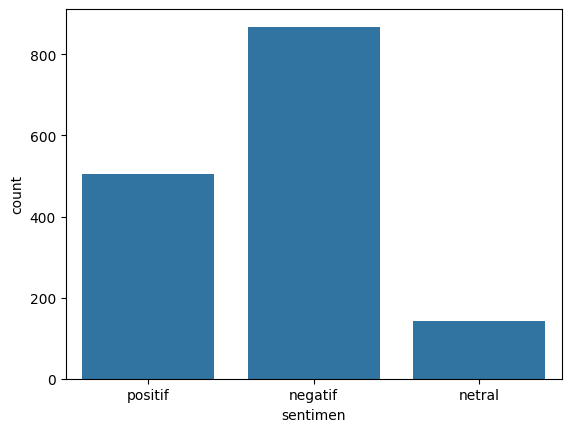

In [9]:
import seaborn as sns
sns.countplot(x='sentimen', data= data)

In [9]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = text.strip()
    
    # Tokenisasi manual
    tokens = text.split()  # Pisahkan berdasarkan spasi
    stop_words = set(stopwords.words('indonesian'))  # Menggunakan stopwords bahasa Indonesia
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return ' '.join(stemmed_tokens)

# Misalnya jika X adalah sebuah DataFrame
X = X.apply(preprocessing)


In [10]:
# Lakukan vectorization pada teks
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [11]:
# Lakukan pembagian dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Lakukan training model KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [13]:
# Lakukan prediksi pada data testing
y_pred = knn.predict(X_test)

In [14]:
# Lakukan evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

Accuracy: 0.6600660066006601
Precision: 0.6545680457708735
Recall: 0.6600660066006601
F1 Score: 0.6377792777982879
Confusion Matrix:
 [[140   0  43]
 [ 15   1  11]
 [ 33   1  59]]


In [27]:
import pandas as pd

# Misalnya, y adalah variabel target
print(pd.Series(y).value_counts())

sentimen
negatif    868
positif    504
netral     142
Name: count, dtype: int64
